In [3]:
import pandas as pd

Будем работать с датасетом по оттоку клиентов из банка https://www.kaggle.com/datasets/shubh0799/churn-modelling, но датасет из себя будет представлять две таблицы:

### Личные данные клиента

    A. CustomerId - Уникальный идентификатор клиента
    B. Surname - Фамилия клиента
    C. Geography - Из какой страны клиент
    D. Gender - Пол клиента
    E. Age - Возраст клиента
    F. EstimatedSalary - Предположительная зарплата клиента

### Данные по поведению клиента в банке

    A. CustomerId - Уникальный идентификатор клиента
    B. CustomerId - Уникальный идентификатор клиента
    C. Tenure - Сколько лет человек является клиентом банка
    D. Balance - Баланс счета
    E. NumOfProducts - Количество открытых продуктов
    F. HasCrCard - Есть ли у клиента кредитная карта
    G. IsActiveMember - Является ли клиент активные участником
    H. Exited - Уйдет ли человек в отток

In [4]:
users = pd.read_csv('users.csv', sep=',')
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exite
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
users.shape

(10000, 14)

### Создание новых признаков

##### Самый простой способ - заполнить новый признак одинаковыми числами:

In [6]:
users['new_feature'] = 0
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exite,new_feature
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


##### Можно создать новый признак, основываясь на уже имеющихся. Для этого:
-	Берем признак через квадратные скобки (users[‘Age’])
-	Делаем любое преобразование (у нас это умножение на 365)
-	Присваиваем измененные данных в новый признак (users[‘Age (days)’] = )

In [7]:
users['Age (days)'] = users['Age'] * 365
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exite,new_feature,Age (days)
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,15695


##### Или же можно пройтись по циклы, используя метод iterrows(), в этом случае мы итерируемся по строкам и получаем все значения одного объекта за раз:

In [8]:
for i, row in users.iloc[:2].iterrows():
    print(row)
    print('__' * 30)

RowNumber                  1
CustomerId          15634602
Surname             Hargrave
CreditScore              619
Geography             France
Gender                Female
Age                       42
Tenure                     2
Balance                  0.0
NumOfProducts              1
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    101348.88
Exite                      1
new_feature                0
Age (days)             15330
Name: 0, dtype: object
____________________________________________________________
RowNumber                  2
CustomerId          15647311
Surname                 Hill
CreditScore              608
Geography              Spain
Gender                Female
Age                       41
Tenure                     1
Balance             83807.86
NumOfProducts              1
HasCrCard                  0
IsActiveMember             1
EstimatedSalary    112542.58
Exite                      0
new_feature                0
Age (days)       

##### Можем проводить разные математические вычисления со значениями в признаке, к примеру:
1.	Сложение +
2.	Вычитание -
3.	Деление /
4.	Умножение *
5.	И так далее
А результат работы можем записать в заранее подготовленный массив:

In [9]:
age_days = []

for i, row in users.iterrows():
    age_days.append(row['Age'] * 365)

age_days[:10]

[15330, 14965, 15330, 14235, 15695, 16060, 18250, 10585, 16060, 9855]

##### И затем добавить этот массив в датафрейм:

In [10]:
users['Age (days) 2'] = age_days
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exite,new_feature,Age (days),Age (days) 2
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,15695,15695


##### Но одна проблема с перебором всех строк датафрейма в цикле - это очень долго. Поэтому можем пользоваться методом apply, который ускоряет обход всех строк. Для этого нужно реализовать функцию (или же пользоваться анонимными функциями) и передать её в метод apply:

In [11]:
def age_to_days(x):
    return x * 365

users['Age (days) 3'] = users['Age'].apply(age_to_days)
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exite,new_feature,Age (days),Age (days) 2,Age (days) 3
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,15330,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,14965,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,15330,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,14235,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,15695,15695,15695


##### Если в вашем наборе данных очень много строк, то и выполнение apply может затянуться, в этом случае можно визуализировать процесс обхода датафрейма через библиотеку tqdm:

In [39]:
import time
from tqdm import tqdm
tqdm.pandas()


def age_to_days(x):
    time.sleep(0.001)
    return x * 365

users['Age'].progress_apply(age_to_days)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:35<00:00, 64.37it/s]


0       15330
1       14965
2       15330
3       14235
4       15695
        ...  
9995    14235
9996    12775
9997    13140
9998    15330
9999    10220
Name: Age, Length: 10000, dtype: int64

### Удаление признаков
Чтобы удалить столбец из таблицы можем пользоваться методом drop():

In [12]:
users.drop(columns='new_feature')
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exite,new_feature,Age (days),Age (days) 2,Age (days) 3
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,15330,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,14965,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,15330,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,14235,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,15695,15695,15695


##### Но замечаем такую особенность, что признак всё равно на месте, он не удалился. Чтобы он на самом деле исчез нужно либо явно переопределить датафрейм:

In [13]:
users = users.drop(columns='new_feature')
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exite,Age (days),Age (days) 2,Age (days) 3
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,15330,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14965,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,15330,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,14235,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,15695,15695,15695


In [14]:
users['new_feature'] = 0

##### Либо указать атрибут inplace=True:

In [15]:
users.drop(columns='new_feature', inplace=True)
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exite,Age (days),Age (days) 2,Age (days) 3
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,15330,15330,15330
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14965,14965,14965
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,15330,15330,15330
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,14235,14235,14235
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,15695,15695,15695


##### При этом можно удалять не только один признак за раз, а целый список признаков:

In [16]:
users.drop(columns=['Age (days)', 'Age (days) 2', 'Age (days) 3'], inplace=True)
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exite
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Изменение существующих признаков

### .loc
Чтобы изменить существующий признак пользуйтесь фильтрацией с помощью .loc, чтобы выделить нужные строки:

In [17]:
users['target'] = 0
users.head() 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exite,target
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


##### Затем указываете, какую колонку хотите изменить:

In [18]:
uИ на какой значение:sers.loc[users['Geography'] == 'France']

SyntaxError: invalid syntax (3326699629.py, line 1)

##### И на какой значение:

In [19]:
users.loc[users['Geography'] == 'France', 'target']

0       0
2       0
3       0
6       0
8       0
       ..
9994    0
9995    0
9996    0
9997    0
9999    0
Name: target, Length: 5014, dtype: int64

##### Если будете менять существующие признаки без .loc, то будете наблюдать подобное предупреждение и признак не будет меняться. Всё из-за того, что меняются значения не в исходном датафрейме, а в его копии:

In [20]:
users[users['Geography'] == 'France']['target'] = 1
users.head()

C:\Users\Иван\AppData\Local\Temp\ipykernel_19012\1082220520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users[users['Geography'] == 'France']['target'] = 1


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exite,target
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [21]:
users.loc[users['Geography'] == 'France', 'target'] = 1
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exite,target
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


### .replace

- Будем работать с pd.Series. 
- pd.Series представляет из себя объект, похожий на одномерный массив, но отличительной чертой является наличие индексов. Индекс находится слева, а сам элемент справа.
- Метод replace() можно вызвать у этого объекта. Вызвать метод значит обратиться к нему через точку у pandas серии (users[‘Gender’].replace()).
- Затем в этот метод можем передать словарь, состоящий из старого значения и нового. При этом, чтобы изменения вступили в силу, нужно либо переопределить признак, либо воспользоваться атрибутом inplace=True:


In [27]:
users['Gender'].replace({'Female': 'F', 'Male': 'M'}, inplace=True)
users.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exite,target
0,1,15634602,Hargrave,619,France,F,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,F,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,F,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,F,39,1,0.00,2,0,0,93826.63,0,1
4,5,15737888,Mitchell,850,Spain,F,43,2,125510.82,1,1,1,79084.10,0,0


### Методы агрегации

- Агрегация, или агрегирование — процесс объединения элементов в одно значение.
- Агрегация данных нужна для того, чтобы подсчитать статистики в таблицы, например, для того, чтобы узнать средний возраст клиентов или же их максимальный чек.
- Дальше обсудим, как можно агрегировать значения в таблицах. 

##### Первый способ - вызвать метод agg() у pd.Series и передать в него список желаемых агрегаций:

In [31]:
users['Age'].agg(['min', 'max'])

min    18
max    92
Name: Age, dtype: int64

##### Второй способ - вызвать метод agg() у датафрейма. Это значит, что после переменной с датафреймом нужно через точку указать название метода .replace. В вызов этого метода можно передать словарь, где
-	 ключ - название признака
-	значение - список желаемых агрегаций

In [32]:
users.agg({
    'Age': ['min', 'max'],
    'EstimatedSalary': 'mean'
})

,Age,EstimatedSalary
min,18.0,NaN
max,92.0,NaN
mean,NaN,100090.239881


##### И третий способ - вызвать метод agg() у датафрейма и передать аргументы (которые будут названиями строк) со значениями кортежа: 

In [33]:
users.agg(
    min_age=('Age', 'min'),
    max_age=('Age', 'max'),
    mean_salary=('EstimatedSalary', 'mean')
)

,Age,EstimatedSalary
min_age,18.0,NaN
max_age,92.0,NaN
mean_salary,NaN,100090.239881


### Методы объединения

In [34]:
bank = pd.read_csv('bank.csv', sep=',')
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exite
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
bank.shape

(10000, 14)

### Метод merge
С помощью метода merge() можно объединить две таблицы по столбцам. У первого датафрейма вызываем метод merge() и в него передаем:
- второй датафрейм
- столбец с левого датафрейма (он же первый), по которому нужно объединение (аргумент left_on)
- столбец с правого датафрейма (он же второй), по которому нужно объединение (аргумент right_on) 

In [36]:
merged = users.merge(bank, left_on='CustomerId', right_on='CustomerId')
merged.head()

,RowNumber_x,CustomerId,Surname_x,CreditScore_x,Geography_x,Gender_x,Age_x,Tenure_x,Balance_x,NumOfProducts_x,...,Geography_y,Gender_y,Age_y,Tenure_y,Balance_y,NumOfProducts_y,HasCrCard_y,IsActiveMember_y,EstimatedSalary_y,Exite_y
0,1,15634602,Hargrave,619,France,F,42,2,0.00,1,...,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,F,41,1,83807.86,1,...,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,F,42,8,159660.80,3,...,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,F,39,1,0.00,2,...,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,F,43,2,125510.82,1,...,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Метод join

##### Данный метод объединяет две таблицы по индексам, поэтому для успешного объединения нужно указать индексы

In [37]:
users_id = users.set_index('CustomerId')
users_id.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exite,target
CustomerId,,,,,,,,,,,,,,
15634602,1,Hargrave,619,France,F,42,2,0.00,1,1,1,101348.88,1,1
15647311,2,Hill,608,Spain,F,41,1,83807.86,1,0,1,112542.58,0,0
15619304,3,Onio,502,France,F,42,8,159660.80,3,1,0,113931.57,1,1
15701354,4,Boni,699,France,F,39,1,0.00,2,0,0,93826.63,0,1
15737888,5,Mitchell,850,Spain,F,43,2,125510.82,1,1,1,79084.10,0,0


In [80]:
bank_id = bank.set_index('CustomerId')
bank_id.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exite
CustomerId,,,,,,,,,,,,,
15634602,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### И затем вызвать метод join у одного из датафреймов

In [39]:
bank_id.join(users_id).head()

ValueError: columns overlap but no suffix specified: Index(['RowNumber', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exite'],
      dtype='object')

##### Чтобы вытащить уникальные идентификаторы пользователей из индексов можно вызвать атрибут reset_index():

In [40]:
bank_id.join(users_id).reset_index().head()

ValueError: columns overlap but no suffix specified: Index(['RowNumber', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exite'],
      dtype='object')

In [41]:
bank.shape

(10000, 14)

### Атрибут how

##### В методах merge и join есть атрибут how, который позволяет указать способ объединения таблиц. 

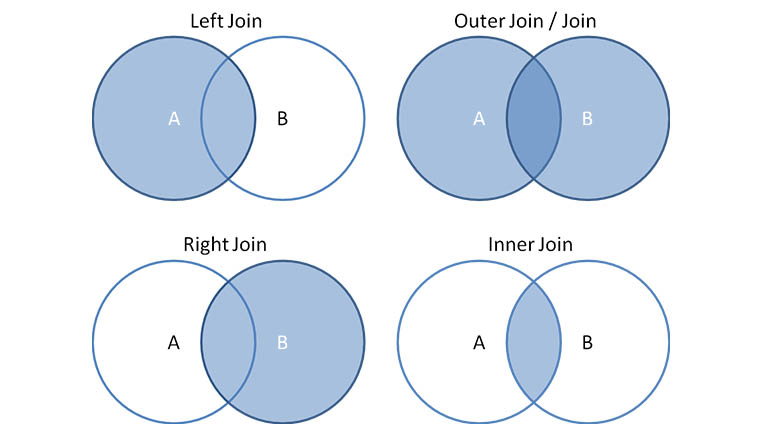https://itproger.com/img/courses/1550660883.jpg

-	left - остаются все объекты с левого датафрейма и ищутся совпадения из правого
-	right - остаются все объекты с правого датафрейма и ищутся совпадения из левого
-	inner - остаются объекты, которые есть и в левом датафрейме, и в правом
-	outer - остаются все объекты из двуз датафреймов

	Возьмем небольшие два датафрейма для наглядности:

In [42]:
toy_df1 = pd.DataFrame({
    'col_1': [1, 2, 3],
    'col_2': [9, 9, 9]
})

toy_df2 = pd.DataFrame({
    'col_1': [3, 4],
    'col_3': [0, 0]
})

display(toy_df1, toy_df2)

,col_1,col_2
0,1,9
1,2,9
2,3,9


,col_1,col_3
0,3,0
1,4,0


##### А теперь объединим их с помощью merge с атрибутом how=’left’:

In [43]:
toy_df1.merge(toy_df2, how='left')

,col_1,col_2,col_3
0,1,9,NaN
1,2,9,NaN
2,3,9,0.0


##### Все строки с левого датафрейма сохранились, а вот с правого одна потерялась, потому что в левом датафрейме не было значения в col_1 равное 4, поэтому эта строка не появилась в результирующем датафрейме.

Теперь объединим их с помощью how=’right’:


In [44]:
toy_df1.merge(toy_df2, how='right')

,col_1,col_2,col_3
0,3,9.0,0
1,4,NaN,0


##### Остались все строки с правого датафрейма, а с левого две не оказались в результирующем датафрейме.

Следующий пример - атрибут how=’inner’:

In [45]:
toy_df1.merge(toy_df2, how='inner')

,col_1,col_2,col_3
0,3,9,0


##### Осталось только их пересечение, а остальные строки не остались.

И заключительный пример с how=’outer’:

In [46]:
toy_df1.merge(toy_df2, how='outer')

,col_1,col_2,col_3
0,1,9.0,NaN
1,2,9.0,NaN
2,3,9.0,0.0
3,4,NaN,0.0


##### А здесь вернулись все строки и с левого, и с правого датафрейма.  

### left

In [47]:
merged_left = bank.merge(users, on='CustomerId', how='left')
merged_left.shape

(10000, 28)

In [48]:
merged_left.isna().sum()

RowNumber_x          0
CustomerId           0
Surname_x            0
CreditScore_x        0
Geography_x          0
Gender_x             0
Age_x                0
Tenure_x             0
Balance_x            0
NumOfProducts_x      0
HasCrCard_x          0
IsActiveMember_x     0
EstimatedSalary_x    0
Exite_x              0
RowNumber_y          0
Surname_y            0
CreditScore_y        0
Geography_y          0
Gender_y             0
Age_y                0
Tenure_y             0
Balance_y            0
NumOfProducts_y      0
HasCrCard_y          0
IsActiveMember_y     0
EstimatedSalary_y    0
Exite_y              0
target               0
dtype: int64

In [49]:
merged_left[merged_left['Age'].isna()]

KeyError: 'Age'

In [50]:
users[users['CustomerId'] == 15682355]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exite,target
9998,9999,15682355,Sabbatini,772,Germany,M,42,3,75075.31,2,1,0,92888.52,1,0


##### right

In [51]:
merged_right = bank.merge(users, on='CustomerId', how='right')
merged_right.shape

(10000, 28)

In [52]:
merged_right.isna().sum()

RowNumber_x          0
CustomerId           0
Surname_x            0
CreditScore_x        0
Geography_x          0
Gender_x             0
Age_x                0
Tenure_x             0
Balance_x            0
NumOfProducts_x      0
HasCrCard_x          0
IsActiveMember_x     0
EstimatedSalary_x    0
Exite_x              0
RowNumber_y          0
Surname_y            0
CreditScore_y        0
Geography_y          0
Gender_y             0
Age_y                0
Tenure_y             0
Balance_y            0
NumOfProducts_y      0
HasCrCard_y          0
IsActiveMember_y     0
EstimatedSalary_y    0
Exite_y              0
target               0
dtype: int64

In [53]:
merged_right[merged_right['CreditScore'].isna()]

KeyError: 'CreditScore'

In [54]:
bank[bank['CustomerId'] == 15611325]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exite
169,170,15611325,Wood,682,Germany,Male,24,9,57929.81,2,0,0,53134.3,0


##### inner

In [55]:
merged_inner = bank.merge(users, on='CustomerId', how='inner')
merged_inner.shape

(10000, 28)

In [56]:
merged_inner.isna().sum()

RowNumber_x          0
CustomerId           0
Surname_x            0
CreditScore_x        0
Geography_x          0
Gender_x             0
Age_x                0
Tenure_x             0
Balance_x            0
NumOfProducts_x      0
HasCrCard_x          0
IsActiveMember_x     0
EstimatedSalary_x    0
Exite_x              0
RowNumber_y          0
Surname_y            0
CreditScore_y        0
Geography_y          0
Gender_y             0
Age_y                0
Tenure_y             0
Balance_y            0
NumOfProducts_y      0
HasCrCard_y          0
IsActiveMember_y     0
EstimatedSalary_y    0
Exite_y              0
target               0
dtype: int64

In [57]:
merged_outer = bank.merge(users, on='CustomerId', how='outer')
merged_outer.shape

(10000, 28)

In [58]:
merged_outer.isna().sum()

RowNumber_x          0
CustomerId           0
Surname_x            0
CreditScore_x        0
Geography_x          0
Gender_x             0
Age_x                0
Tenure_x             0
Balance_x            0
NumOfProducts_x      0
HasCrCard_x          0
IsActiveMember_x     0
EstimatedSalary_x    0
Exite_x              0
RowNumber_y          0
Surname_y            0
CreditScore_y        0
Geography_y          0
Gender_y             0
Age_y                0
Tenure_y             0
Balance_y            0
NumOfProducts_y      0
HasCrCard_y          0
IsActiveMember_y     0
EstimatedSalary_y    0
Exite_y              0
target               0
dtype: int64

### Методы группировок

#### groupby
В данном методе вначале происходит разбиение на группы, а затем можно сделать агрегацию по любой агрегирующей функции

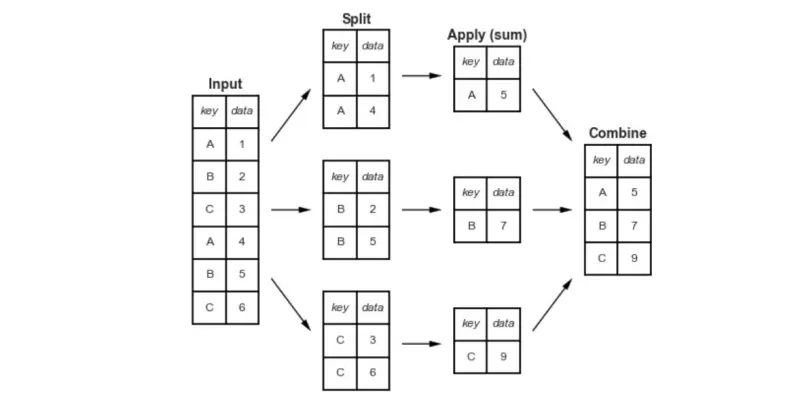https://i0.wp.com/lifewithdata.com/wp-content/uploads/2022/02/group2.jpeg?resize=798%2C419&ssl=1

In [59]:
toy_df = pd.DataFrame({
    'client_id': [1, 2, 2, 3, 1, 1],
    'item': ['chocolate', 'cheese', 'ham', 'candy', 'chair', 'book'],
    'price': [68, 280, 302, 39, 2099, 1089]
})

toy_df

,client_id,item,price
0,1,chocolate,68
1,2,cheese,280
2,2,ham,302
3,3,candy,39
4,1,chair,2099
5,1,book,1089


##### Сделаем группировку по идентификатору клиента, на выходе видим результат группировки:

In [60]:
grouped = toy_df.groupby('client_id')
grouped

##### По атрибуту groups можем получить 3 группы наших клиентов и их индексы:

In [61]:
grouped.groups

{1: [0, 4, 5], 2: [1, 2], 3: [3]}

##### И теперь можем делать любые агрегации, которые захотим, при этом их может быть несколько:

In [62]:
grouped.sum()

,price
client_id,
1,3256
2,582
3,39


In [63]:
grouped.agg({'price': ['sum', 'min', 'max']}

SyntaxError: unexpected EOF while parsing (4286964961.py, line 1)

##### И посмотрим группировки на данных про клиентов банка, для этого сгруппируем их по признаку Geography и найдем средний возраст и минимальную заработную плату по странам:

In [64]:
users.groupby('Geography').agg({'Age': ['mean'], 'EstimatedSalary': ['min']})

,Age,EstimatedSalary
,mean,min
Geography,,
France,38.511767,90.07
Germany,39.771622,11.58
Spain,38.890997,417.41


In [65]:
toy_df

,client_id,item,price
0,1,chocolate,68
1,2,cheese,280
2,2,ham,302
3,3,candy,39
4,1,chair,2099
5,1,book,1089


pivot_table (сводная таблица) - это мощный инструмент для обобщения и представления данных.
    Параметры pivot_table():
- index – столбец, который будет использован для строк
- columns – столбец, который будет использован для столбцов
- values – столбец обрабатываемых значений
- aggfunc – функция, применяемая к values
- fill_value – значение по умолчанию
- margins – если True, то добавляется столбец All (Итого). По умолчанию: False

##### Вызовем pivot_table для игрушечного примера. Посчитаем сумму для столбца price для клиентов:

In [66]:
toy_df.pivot_table(index='client_id',
                   values='price',
                   aggfunc='sum')

,price
client_id,
1,3256
2,582
3,39


##### При этом в атрибут aggfunc можно передавать словарь и тем самым мы получим точно такую же группировку, как и при использовании groupby:

In [67]:
users.pivot_table(index='Geography',
                  aggfunc={'Age': ['mean'], 'EstimatedSalary': 'min'})

,Age,EstimatedSalary
,mean,min
Geography,,
France,38.511767,90.07
Germany,39.771622,11.58
Spain,38.890997,417.41


In [68]:
users.pivot_table(index='Geography',
                  columns='Gender', 
                  values='EstimatedSalary',
                  aggfunc='mean',
                  margins=True,
                  margins_name='Total')

Gender,F,M,Total
Geography,,,
France,99564.252755,100174.252495,99899.180814
Germany,102446.424124,99905.033959,101113.435102
Spain,100734.107475,98425.687680,99440.572281
Total,100601.541382,99664.576931,100090.239881


Функция crosstab создает таблицу кросс-табуляции, которая по умолчанию может показать частоту, с которой появляются определенные группы данных.

Параметры crosstab():
- index - значения для группировки по строкам
- columns - значения для группировки по столбцам
- values - агрегируемый столбец (или столбцы)
- aggfunc - функция, которая будет применена к каждой группе значений values, сгруппированным по значениям index и columns. Значения этой функции и есть значения сводной таблицы
- margins - добавляет результирующий столбец/строку
- normalize: boolean, {'all', 'index', 'columns'} - нормировка всей таблицы (или только по строкам/столбцам).

In [69]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'])

Gender,F,M
Geography,,
France,2261,2753
Germany,1193,1316
Spain,1089,1388


##### Можем добавить и колонку, которую надо агрегировать, теперь подсчитываем, какая средняя зарплата в зависимости от пола и страны человека:

In [70]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            values=users['EstimatedSalary'],
            aggfunc='mean')

Gender,F,M
Geography,,
France,99564.252755,100174.252495
Germany,102446.424124,99905.033959
Spain,100734.107475,98425.687680


##### В функции crosstab есть нормировка по значениям:
-	атрибут normalize=’all’ - нормировка по всем значениям

In [71]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='all')

Gender,F,M
Geography,,
France,0.2261,0.2753
Germany,0.1193,0.1316
Spain,0.1089,0.1388


##### -	атрибут normalize=’index’ - нормировка по строкам

In [72]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='index')

Gender,F,M
Geography,,
France,0.450937,0.549063
Germany,0.475488,0.524512
Spain,0.439645,0.560355


##### -	атрибут normalize=’columns’ - нормировка по столбцам

In [73]:
pd.crosstab(index=users['Geography'],
            columns=users['Gender'],
            normalize='columns')

Gender,F,M
Geography,,
France,0.497689,0.504490
Germany,0.262602,0.241158
Spain,0.239709,0.254352


### Встроенные визуализации

hist() - гистограмма. С помощью неё можем изучить распределение возраста наших клиентов

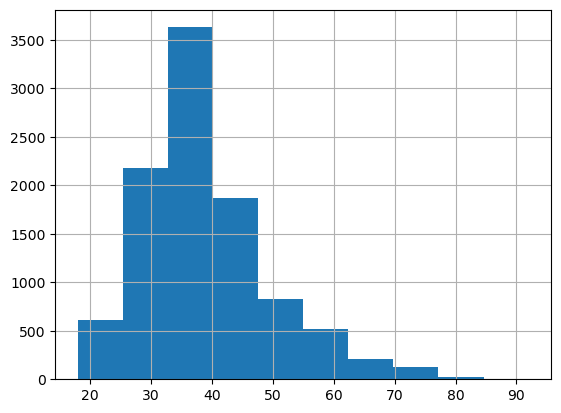

In [74]:
users['Age'].hist();

pie() - круговая диаграмма, с помощью неё поизучаем долю мужчин и долю женщин среди наших клиентов

In [75]:
data = users.groupby('Gender').count()['Age']
data.name = 'Gender'
data

Gender
F    4543
M    5457
Name: Gender, dtype: int64

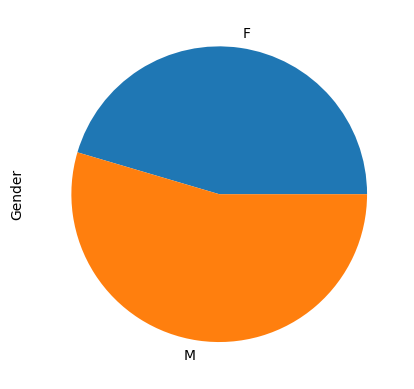

In [76]:
data.plot.pie(y='Gender');

scatter() - точечный график, он показывает взаимное распределение признаков. Изучим, а есть ли зависимость между возрастом клиента и его заработной платой

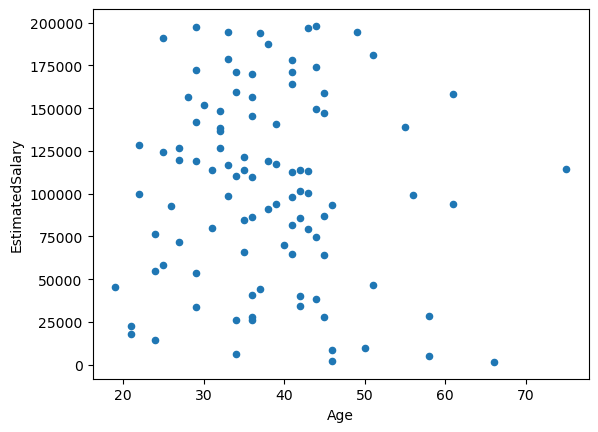

In [77]:
users.iloc[:100].plot.scatter(x='Age', y='EstimatedSalary');

bar() - столбчатая диаграмма, показывает количество объектов в каждой категории. Посмотрим, сколько уже лет люди являются клиентами нашего банка

In [78]:
data = bank.groupby('Tenure').count()['Balance']
data.name = 'num_clients'
data

Tenure
0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
Name: num_clients, dtype: int64

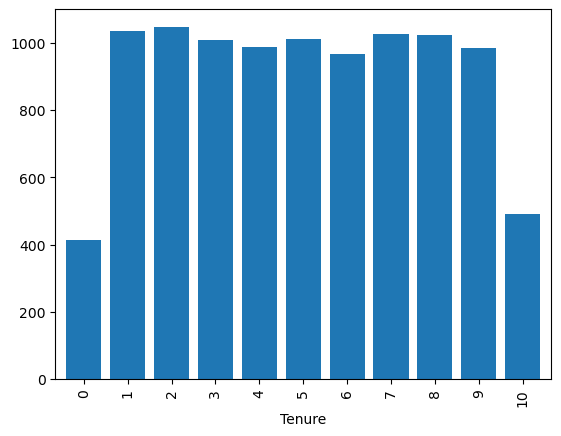

In [79]:
data.plot.bar(width=0.8);


##### Рекомендуемая дополнительная литература или материалы
1.	pandas.DataFrame.merge https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
2.	pandas.DataFrame.plot https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
    Используемая литература или материалы
1.	Агрегации и группировки https://pythonru.com/uroki/osnovy-pandas-2-agregacija-i-gruppirovka
